In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#coordinates

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | zhigansk
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | kouango
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | karratha
Processing Record 17 of Set 1 | sioux lookout
Processing Record 18 of Set 1 | goundam
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | wa
City not found. Skipping...
Processing Record 21 of Set 1 | matay
Processing Record 22 of Set 1 | port alfre

Processing Record 41 of Set 4 | san
Processing Record 42 of Set 4 | neyshabur
Processing Record 43 of Set 4 | wanning
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | asayita
City not found. Skipping...
Processing Record 46 of Set 4 | chokwe
Processing Record 47 of Set 4 | tecoanapa
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | halalo
City not found. Skipping...
Processing Record 50 of Set 4 | chumikan
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | kinablangan
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | ust-maya
Processing Record 5 of Set 5 | garbovi
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | chagda
City not found. Skipping...
Processing Record 8 of Set 5 | mazagao
Processing Record 9 of Set 5 | gravdal
Processing Record 10 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 5 | parthenay
Processing 

Processing Record 25 of Set 8 | gorin
Processing Record 26 of Set 8 | gobabis
Processing Record 27 of Set 8 | szamotuly
Processing Record 28 of Set 8 | kurumkan
Processing Record 29 of Set 8 | yanam
Processing Record 30 of Set 8 | chapais
Processing Record 31 of Set 8 | puerto escondido
Processing Record 32 of Set 8 | mar del plata
Processing Record 33 of Set 8 | san quintin
Processing Record 34 of Set 8 | tay ninh
Processing Record 35 of Set 8 | lichtervelde
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | bahia blanca
Processing Record 38 of Set 8 | kabompo
Processing Record 39 of Set 8 | allanmyo
City not found. Skipping...
Processing Record 40 of Set 8 | loucna nad desnou
Processing Record 41 of Set 8 | rognan
Processing Record 42 of Set 8 | kasempa
Processing Record 43 of Set 8 | san policarpo
Processing Record 44 of Set 8 | sinnamary
Processing Record 45 of Set 8 | fremont
Processing Record 46 of Set 8 | brigantine
Processing Record 47 of Set 8 | murot

Processing Record 14 of Set 12 | quelimane
Processing Record 15 of Set 12 | rahuri
Processing Record 16 of Set 12 | yuci
Processing Record 17 of Set 12 | synya
Processing Record 18 of Set 12 | santa rosalia
Processing Record 19 of Set 12 | gigmoto
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | anloga
Processing Record 22 of Set 12 | bulgan
Processing Record 23 of Set 12 | pochutla
Processing Record 24 of Set 12 | nova vicosa
Processing Record 25 of Set 12 | villa maria
Processing Record 26 of Set 12 | rantauprapat
Processing Record 27 of Set 12 | sciacca
Processing Record 28 of Set 12 | umm kaddadah
Processing Record 29 of Set 12 | paradwip
City not found. Skipping...
Processing Record 30 of Set 12 | aykhal
Processing Record 31 of Set 12 | kapoeta
Processing Record 32 of Set 12 | yambio
Processing Record 33 of Set 12 | naigarhi
Processing Record 34 of Set 12 | zar
Processing Record 35 of Set 12 | kamaishi
Processing Record 36 of Set 12 | pandhana
Processing Rec

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [46]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2021-11-25 04:58:52,-0.9492,100.3543,87.85,60,62,6.53
1,Busselton,AU,2021-11-25 04:58:52,-33.6500,115.3333,83.08,35,47,4.47
2,Avarua,CK,2021-11-25 04:54:46,-21.2078,-159.7750,78.85,69,55,10.36
3,Tasiilaq,GL,2021-11-25 04:58:53,65.6145,-37.6368,19.94,80,100,9.95
4,Caravelas,BR,2021-11-25 04:58:53,-17.7125,-39.2481,73.06,84,74,6.76
5,Zhigansk,RU,2021-11-25 04:58:53,66.7697,123.3711,-10.95,87,100,6.73
6,Maceio,BR,2021-11-25 04:55:02,-9.6658,-35.7353,76.44,94,20,4.61
7,Nikolskoye,RU,2021-11-25 04:58:54,59.7035,30.7861,31.89,92,100,6.46
8,Kouango,CF,2021-11-25 04:58:54,4.9934,19.9619,69.96,63,33,2.26
9,Rikitea,PF,2021-11-25 04:58:54,-23.1203,-134.9692,76.57,76,52,12.08


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [50]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1637865225.6561432

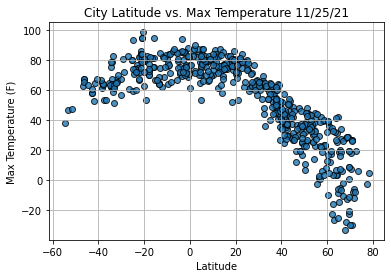

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

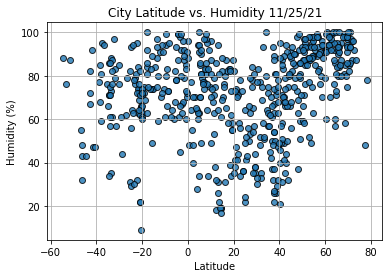

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

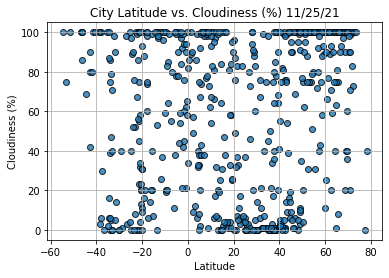

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

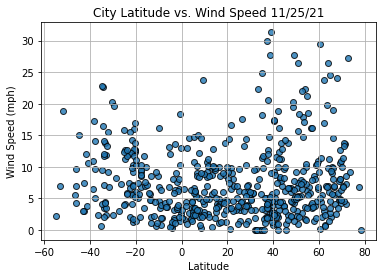

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()